In [1]:
### This script simulates N-strain dynamics in the coinfection model (le TMT et al. 2021) when there is variation 
### in only coinfection clearance rates between similar strains. Below, we simulate the replicator
### dynamics derived for this model on the slow time scale \epsilon t.

import numpy as np
from scipy import integrate
import scipy.integrate  as  ode
import matplotlib.pyplot  as  plt

np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline

In [4]:
def repli(k): #solve the solution for replicator
    #parameters
    m = beta/R0

    #computation
    S_star = m/beta
    T_star = 1 - S_star
    I_star = m*T_star/(m + beta*k*T_star)
    J_star = T_star - I_star
    detP = -I_star*J_star + 2*(T_star)**2

    teth3 = T_star*J_star/detP #set gamma = 1
    
    lamd = np.zeros((n,n))
    for i in range (0, n):
        for j in range (0, n):
            lamd[i][j] = teth3*(-nu2d[i][j] - nu2d[j][i] + 2*nu2d[j][j]) # pairwise invasion fitness
    #replicator system and solve
    def du_dt(u, t = 0):
        return u*(np.dot(lamd,u) - np.dot(np.dot(lamd,u),u))
        
    u, infodict = integrate.odeint(du_dt, u0, t, full_output = True)
    infodict['message']
    s = []
    for i in range(0, n):
        s.append(u.T[i])
    
    return s

In [5]:
# value of variations u_{ij}
nu2d = np.array([[ 3.,  3., -3., -5., -4., -1.,  2., -2., -3.,  3.],
 [ 2., -1.,  1., -4., -4., -1., -3.,  3.,  4.,  0.],
 [-4., -4., -3., -3.,  4., -4.,  3., -1.,  3., -2.],
 [-3., -5.,  0., -1.,  0.,  1., -5., -2.,  4.,  3.],
 [-4.,  2.,  0.,  2., -2., -2., -4., -2.,  0., -2.],
 [ 1., -5., -3.,  2.,  3., -2., -1.,  4., -3., -1.],
 [ 2., -5., -5., -5., -4., -4.,  1., -3., -1., -2.],
 [-4.,  1., -1., -1.,  4., -5.,  3., -1.,  3., -1.],
 [-5.,  0.,  2.,  3.,  4., -3., -5., -4.,  2.,  2.],
 [-3.,  2.,  3.,  3.,  1., -1.,  1.,  2., -3., -2.]])

### We define the parameter of the neutral model
n = 10 # n: number of strains
beta = 4
R0 = 2
u0 = np.array([0.15, 0.08, 0.15, 0.18, 0.09, 0.08, 0.12, 0.05, 0.05, 0.05])
t = np.linspace(0, 30, 500)

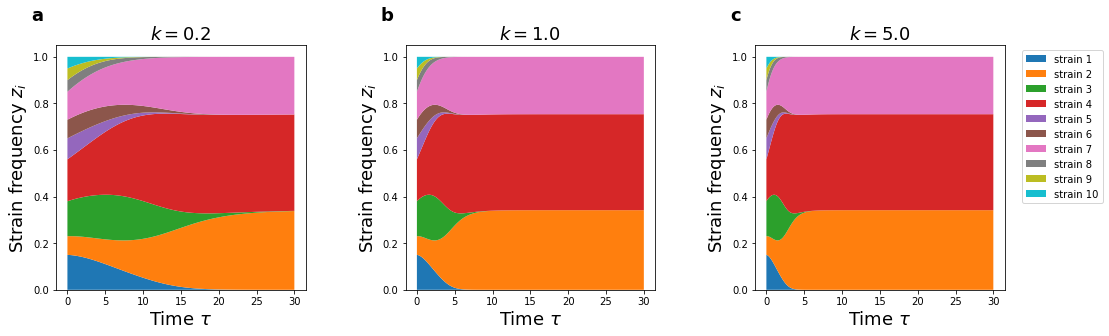

In [7]:
k_value = np.array([0.2, 1, 5])
order = np.array(['a', 'b', 'c'])

fig, ax = plt.subplots(1, len(k_value), figsize = (17,4.5))
fig.subplots_adjust(wspace = 0.4)

labels = []
for i in range(0,n):
    labels.append('strain {}'.format(i+1))

for i in range (0, len(k_value)):
    s = repli(k_value[i])
    ax[i].stackplot(t, s, labels = labels)
    ax[i].set_xlabel("Time $\\tau$", fontsize = 18)
    ax[i].set_ylabel("Strain frequency $z_i$", fontsize = 18)
    ax[i].set_title('$k = {}$'.format(k_value[i]), fontsize = 18)
    ax[i].text(-0.1, 1.1, '{}'.format(order[i]), transform=ax[i].transAxes, size=18, weight='bold')

ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')